# Limpeza de Dados da MegaSuper Vendas

# Inicio

### Bibliotecas Utilizadas

- **pandas**: Manipulação de dados.
- **re**: Expressões regulares.
- **matplotlib.pyplot**: Gráficos.
- **seaborn**: Visualização de dados.

In [2]:
import pandas as pd  # Para manipulação de dados.
import re  # Para trabalhar com expressões regulares.
import matplotlib.pyplot as plt  # Para criação de gráficos.
import seaborn as sns  # Para visualização de dados.

### Carregamento e Ordenação dos Dados

- **Carregamento**: O arquivo CSV 'BD_Original.csv' foi carregado em um DataFrame.
- **Ordenação**: O DataFrame foi ordenado pela coluna 'id_da_compra' em ordem crescente.
- **Visualização**: As 5 primeiras linhas do DataFrame ordenado foram exibidas para inspeção inicial.

In [ ]:
df = pd.read_csv('DB_Original.csv')  # Carrega o arquivo CSV 'DB_Original.csv' em um DataFrame.

# Ordena o DataFrame pela coluna 'id_da_compra' em ordem crescente
df = df.sort_values(by='id_da_compra') 

display(df.head(5))  # Exibe as 5 primeiras linhas do DataFrame ordenado.

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
119876,0,2019-07-07,11:05:44,PEDRO SILVA RAMOS,Sabonete,"R$ 288,20000000000005",7,25.40,Aguardando Pgto,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Lux
143431,0,2019-07-07,11:05:44,PEDRO SILVA RAMOS,Sabonete,"R$ 2,4",15,46.00,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Nivea
4853,0,2019-07-07,11:05:44,PEDRO SILVA RAMOS,Macarrão,"R$ 2,63",14,46.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,3642XXXX,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Renata
364791,0,2019-07-07,11:05:44,PEDRO SILVA RAMOS,Pasta de Dente,"R$ 2,98",9,36.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Colgate
170364,1,2018-08-23,17:52:53,PEDRO DA SILVA BIANQUINI,Sabonete,"R$ 2,37",9,21.33,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,0.0,Cartão de Crédito,HENRICO VICTOR ALVES,Dove


__Inspeção dos Dados__

- **Verificação de Estrutura**: A função `info()` foi utilizada para obter um resumo das colunas, tipos de dados e valores nulos presentes no DataFrame.


In [4]:
df.info()  # Exibe informações gerais sobre o DataFrame, como número de entradas, tipos de dados e valores nulos.

<class 'pandas.core.frame.DataFrame'>
Index: 368752 entries, 119876 to 296019
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id_da_compra  368752 non-null  int64  
 1   data          368752 non-null  object 
 2   hora          368752 non-null  object 
 3   cliente       368752 non-null  object 
 4   produto       368752 non-null  object 
 5   valor         368752 non-null  object 
 6   quantidade    368752 non-null  int64  
 7   total         365067 non-null  float64
 8   status        368752 non-null  object 
 9   cidade        368752 non-null  object 
 10  estado        368752 non-null  object 
 11  pais          368752 non-null  object 
 12  cep           368752 non-null  object 
 13  frete         361381 non-null  float64
 14  pagamento     368752 non-null  object 
 15  vendedor      365072 non-null  object 
 16  marca         368752 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage

# Coluna data

- **Conversão de Data**: A coluna 'data' foi convertida para o formato de data (datetime) usando o formato 'ano-mês-dia'.Troca o tipo da data (object) para o tipo data e organiza o layout em DD/MM/YYYY

In [5]:
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')  # Converte a coluna 'data' para o formato datetime (ano-mês-dia).
display(df[['data']].head(5))  # Exibe as 5 primeiras linhas da coluna 'data' convertida.

,data
119876,2019-07-07
143431,2019-07-07
4853,2019-07-07
364791,2019-07-07
170364,2018-08-23


### Identificação de Valores Nulos

- **Detecção de Nulos**: Foi utilizado o método `isna()` para identificar as linhas do DataFrame onde a coluna 'data' possui valores nulos (NaN).
- **Visualização**: As linhas com valores nulos na coluna 'data' foram exibidas para análise.

In [6]:
print(df[df['data'].isna()])  # Exibe as linhas do DataFrame onde a coluna 'data' tem valores nulos (NaN).

Empty DataFrame
Columns: [id_da_compra, data, hora, cliente, produto, valor, quantidade, total, status, cidade, estado, pais, cep, frete, pagamento, vendedor, marca]
Index: []


# Coluna hora

## Conversão de Dados de Hora
- **Conversão de Hora**: A coluna 'hora' foi convertida para o formato de hora (HH:MM:SS), garantindo a consistência no formato de tempo.
- **Visualização**: As 5 primeiras entradas da coluna 'hora' convertida foram exibidas para verificar a alteração.Converte a hora para o tipo Time

In [7]:
### Identificação de Valores Nulos

df['hora'] = pd.to_datetime(df['hora'], format='%H:%M:%S', errors='coerce')
df['hora'] = df['hora'].dt.time

# Verificar os tipos das colunas
display(df[['hora']].head(5))

,hora
119876,11:05:44
143431,11:05:44
4853,11:05:44
364791,11:05:44
170364,17:52:53


### Identificação de Valores Nulos em 'Hora'

- **Detecção de Nulos em 'Hora'**: Utilizou-se o método `isna()` para identificar as linhas do DataFrame onde a coluna 'hora' possui valores nulos (NaN).
- **Visualização**: As linhas com valores nulos na coluna 'hora' foram exibidas para análise.


In [8]:
print(df[df['hora'].isna()])  # Exibe as linhas do DataFrame onde a coluna 'hora' tem valores nulos (NaN).

Empty DataFrame
Columns: [id_da_compra, data, hora, cliente, produto, valor, quantidade, total, status, cidade, estado, pais, cep, frete, pagamento, vendedor, marca]
Index: []


# Coluna cliente 

### Identificação de Caracteres Especiais em 'Cliente'

- **Expressão Regular**: Foi utilizada uma expressão regular para identificar caracteres especiais na coluna 'cliente', ignorando letras, números, espaços e pontuações comuns.
- **Filtragem**: As linhas que contêm caracteres especiais na coluna 'cliente' foram filtradas e exibidas.


In [9]:
# Expressão regular para encontrar caracteres especiais, ignorando letras, números, espaços, "ç" e pontuações comuns
regex = r'[^a-zA-Z0-9\s.,!?ÔÇÃÉ;:\'\"()-]'  # Define uma regex para identificar caracteres especiais indesejados.

# Filtrar linhas onde a coluna 'cliente' contém caracteres especiais
clientes_com_especiais = df[df['cliente'].str.contains(regex, regex=True, na=False)]  # Filtra as linhas onde 'cliente' contém caracteres especiais.

# Exibir as primeiras ocorrências, se houver
display(clientes_com_especiais)  # Exibe as linhas filtradas para inspeção.

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca


### Verificação de Valores Nulos

- **Contagem de Nulos**: Foi utilizado o método `isnull().sum()` para contar o número de valores nulos (NaN) em cada coluna do DataFrame.

In [10]:
display(df.isnull().sum())  # Exibe o número de valores nulos (NaN) por coluna no DataFrame.

id_da_compra       0
data               0
hora               0
cliente            0
produto            0
valor              0
quantidade         0
total           3685
status             0
cidade             0
estado             0
pais               0
cep                0
frete           7371
pagamento          0
vendedor        3680
marca              0
dtype: int64

### Normalização e Limpeza de Espaços em 'Cliente'

- **Capitalização**: A coluna 'cliente' foi ajustada para que a primeira letra de cada palavra fosse convertida para maiúscula.
- **Espaços no Início e Fim**: Remoção de espaços extras no início e final das strings.
- **Espaços Múltiplos**: Substituição de múltiplos espaços consecutivos por um único espaço.


In [11]:
df['cliente'] = df['cliente'].str.title()  # Converte a primeira letra de cada palavra para maiúscula.
df['cliente'] = df['cliente'].str.strip()  # Remove espaços no início e no final da string.
df['cliente'] = df['cliente'].str.replace(r'\s+', ' ', regex=True)  # Substitui múltiplos espaços por um único espaço.

### Conversão de Tipo da Coluna 'cliente'

- **Tipo de Dados**: A coluna 'cliente' foi convertida para o tipo `string` do pandas, garantindo melhor desempenho e compatibilidade com operações de texto e a melhora na legibilidade.

In [12]:
df['cliente'] = df['cliente'].astype('string')

# Coluna produto 

### Identificação de Produtos Únicos

- **Valores Únicos**: A função `unique()` foi utilizada para listar todos os valores distintos presentes na coluna 'produto'.


In [13]:
# Exibe os valores únicos presentes na coluna 'produto' do DataFrame.
df['produto'].unique()

array(['Sabonete', 'Macarrão', 'Pasta de Dente', 'Detergente',
       'Refrigerante', 'Água Mineral', 'Açúcar', 'Shampoo', 'Café',
       'Queijo Mussarela', 'Suco de Laranja', 'Óleo de Soja', 'Vinho',
       'Manteiga', 'Pão de Forma', 'Farinha de Trigo', 'Leite Integral',
       'Biscoito Recheado', 'Arroz', 'Feijão', 'Sal', 'Molho de Tomate',
       'Desinfetante', 'Papel Toalha', 'Presunto', 'Amaciante',
       'Papel Higiênico', 'Queijo Mussarela#$@!', 'Condicionador',
       'Vinho#$@!', 'Cerveja', 'Detergente#$@!', 'Sabão em Pó', 'Sal#$@!',
       'Manteiga#$@!', 'Papel Toalha#$@!', 'Papel Higiênico#$@!',
       'Desinfetante#$@!', 'Café#$@!', 'Amaciante#$@!',
       'Pasta de Dente#$@!', 'Sabonete#$@!', 'Açúcar#$@!', 'Macarrão#$@!',
       'Molho de Tomate#$@!', 'Carvão', 'Água Mineral#$@!',
       'Biscoito Recheado#$@!', 'Pão de Forma#$@!', 'Óleo de Soja#$@!',
       'Farinha de Trigo#$@!', 'Condicionador#$@!', 'Presunto#$@!',
       'Cerveja#$@!', 'Sabão em Pó#$@!', 'Arroz#$

### Remoção de Caracteres Especiais em 'Produto'

- **Remoção de Caracteres Especiais**: A string "#$@!" foi removida da coluna 'produto', e espaços em branco extras foram eliminados.
- **Visualização de Valores Únicos**: A função `unique()` foi usada novamente para verificar os valores únicos da coluna 'produto' após a remoção dos caracteres.


In [14]:
# Remove os caracteres especiais "#$@!" e espaços extras.
df['produto'] = df['produto'].str.replace('#$@!', '', regex=False).str.strip() 

# Exibe os valores únicos atualizados da coluna 'produto'.
df['produto'].unique()  

array(['Sabonete', 'Macarrão', 'Pasta de Dente', 'Detergente',
       'Refrigerante', 'Água Mineral', 'Açúcar', 'Shampoo', 'Café',
       'Queijo Mussarela', 'Suco de Laranja', 'Óleo de Soja', 'Vinho',
       'Manteiga', 'Pão de Forma', 'Farinha de Trigo', 'Leite Integral',
       'Biscoito Recheado', 'Arroz', 'Feijão', 'Sal', 'Molho de Tomate',
       'Desinfetante', 'Papel Toalha', 'Presunto', 'Amaciante',
       'Papel Higiênico', 'Condicionador', 'Cerveja', 'Sabão em Pó',
       'Carvão', 'ieijão', 'Manteigt', 'Mopho de Tomate', 'Papel Twalha',
       'Arroc', 'Presuntd', 'Deqergente', 'zabonete', 'Mqcarrão',
       'Água Mineras', 'Açúcaz', 'Deterwente', 'Macirrão', 'Macawrão',
       'Cnfé', 'Água Mineual', 'Scl', 'Desinfetanue', 'tal', 'Majarrão',
       'Amaciayte', 'Qbeijo Mussarela', 'Refrigkrante', 'Sucoyde Laranja',
       'Papel qoalha', 'Queijo Mussarelz', 'Clfé', 'Sabonepe',
       'Farinha de Tripo', 'Molmo de Tomate', 'Biscoitq Recheado', 'Caft',
       'Condibionador'

### Correção de Nomes de Produtos

- **Correção de Erros de Digitação**: Um dicionário foi utilizado para corrigir erros de digitação nos nomes dos produtos na coluna 'produto'.
- **Visualização de Valores Únicos**: Após as correções, a função `unique()` foi usada para visualizar os valores únicos da coluna 'produto' atualizada.


In [15]:
# Dicionário de correções de produtos com nomes errados
correcao_produtos = {
    "ieijão": "Feijão",
    "Manteigt": "Manteiga",
    "Mopho de Tomate": "Molho de Tomate",
    "Papel Twalha": "Papel Toalha",
    "Presuntd": "Presunto",
    "Arroc": "Arroz",
    "Deqergente": "Detergente",
    "zabonete": "Sabonete",
    "Mqcarrão": "Macarrão",
    "Açúcaz": "Açúcar",
    "Deterwente": "Detergente",
    "Macirrão": "Macarrão",
    "Macawrão": "Macarrão",
    "Cnfé": "Café",
    "Água Mineual": "Água Mineral",
    "Scl": "Sal",
    "Desinfetanue": "Desinfetante",
    "tal": "Sal",
    "Majarrão": "Macarrão",
    "Amaciayte": "Amaciante",
    "Qbeijo Mussarela": "Queijo Mussarela",
    "Refrigkrante": "Refrigerante", 
    "Sucoyde Laranja": "Suco de Laranja",
    "Papel qoalha": "Papel Toalha",
    "Água Mineras": "Água Mineral",
    "Queijo Mussarelz": "Queijo Mussarela",
    "Sabonepe": "Sabonete",
    "Clfé": "Café",
    "Farinha de Tripo": "Farinha de Trigo",
    "Molmo de Tomate": "Molho de Tomate",
    "Biscoitq Recheado": "Biscoito Recheado",
    "Caft": "Café",
    "Condibionador": "Condicionador",
    "Cafc": "Café",
    "Desinfekante": "Desinfetante",
    "Caff": "Café",
    "Condicioiador": "Condicionador"
}

# Substitui os nomes errados na coluna 'produto' com o dicionário de correções
df["produto"] = df["produto"].replace(correcao_produtos)

# Exibe os valores únicos atualizados da coluna 'produto' após a correção.
df['produto'].unique()

array(['Sabonete', 'Macarrão', 'Pasta de Dente', 'Detergente',
       'Refrigerante', 'Água Mineral', 'Açúcar', 'Shampoo', 'Café',
       'Queijo Mussarela', 'Suco de Laranja', 'Óleo de Soja', 'Vinho',
       'Manteiga', 'Pão de Forma', 'Farinha de Trigo', 'Leite Integral',
       'Biscoito Recheado', 'Arroz', 'Feijão', 'Sal', 'Molho de Tomate',
       'Desinfetante', 'Papel Toalha', 'Presunto', 'Amaciante',
       'Papel Higiênico', 'Condicionador', 'Cerveja', 'Sabão em Pó',
       'Carvão'], dtype=object)

### Padronização dos Nomes de Produtos

- **Conversão para Minúsculas**: Todos os valores da coluna 'produto' foram convertidos para letras minúsculas para garantir consistência nos dados.


In [16]:
# Converte todos os nomes de produtos para letras minúsculas
df['produto'] = df['produto'].str.lower()

### Conversão de Tipo da Coluna 'produto'

- **Tipo de Dados**: A coluna 'produto' foi convertida para o tipo `string` do pandas, garantindo melhor desempenho e compatibilidade com operações de texto e a melhora na legibilidade.

In [17]:
df['produto'] = df['produto'].astype('string')

# Coluna valor 

### Verificação de Valores Nulos

- **Contagem de Valores Nulos**: A função `isnull().sum()` foi utilizada para identificar a quantidade de valores ausentes em cada coluna do DataFrame.


In [18]:
# Exibe a quantidade de valores nulos em cada coluna do DataFrame
display(df.isnull().sum())

id_da_compra       0
data               0
hora               0
cliente            0
produto            0
valor              0
quantidade         0
total           3685
status             0
cidade             0
estado             0
pais               0
cep                0
frete           7371
pagamento          0
vendedor        3680
marca              0
dtype: int64

### Correção de Valores Repetidos

- **Identificação de Valores Corrompidos**: Foi utilizada uma expressão regular (`\d+,\d{2}`) para capturar corretamente valores numéricos no formato adequado.
- **Correção Aplicada**: A função `corrigir_valor` foi aplicada na coluna 'valor' para garantir que apenas o primeiro número válido fosse mantido.


In [19]:
# Função para corrigir valores repetidos no formato numérico
def corrigir_valor(valor):
    match = re.search(r'(\d+,\d{2})', valor)  # Captura o primeiro número válido no formato 'X,XX'
    return match.group(1) if match else valor  # Retorna o número corrigido ou o valor original caso não encontre

# Aplica a função apenas na coluna 'valor'
df['valor'] = df['valor'].apply(corrigir_valor)

### Padronização da Coluna 'valor'

- **Remoção de Formatação Monetária**: O símbolo "R$" foi removido da coluna 'valor'.
- **Substituição de Separador Decimal**: A vírgula foi substituída por um ponto para padronizar o formato numérico.
- **Conversão para Tipo Numérico**: A coluna foi convertida para `float`, garantindo que todos os valores sejam tratados corretamente em cálculos.
- **Verificação de Valores Nulos**: O número de valores ausentes foi exibido antes e depois da conversão para monitoramento da transformação.


In [20]:
# Exibe a quantidade de valores NaN antes da transformação
display(df['valor'].isnull().sum())

# Remove "R$", substitui vírgula por ponto e converte para número
df['valor'] = df['valor'].astype(str).str.replace('R$', '', regex=False)  # Remove o símbolo de moeda
df['valor'] = df['valor'].str.replace(',', '.', regex=False).str.strip()  # Substitui vírgula por ponto e remove espaços extras
df['valor'] = pd.to_numeric(df['valor'], errors='coerce')  # Converte para número, substituindo erros por NaN

# Exibe a quantidade de valores NaN após a conversão
display(df['valor'].isnull().sum())

# Converte para float e exibe o DataFrame final
df['valor'] = df['valor'].astype(float)
display(df.head(5))  # Exibe as primeiras linhas do DataFrame atualizado


np.int64(0)

np.int64(0)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
119876,0,2019-07-07,11:05:44,Pedro Silva Ramos,sabonete,288.20,7,25.40,Aguardando Pgto,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Lux
143431,0,2019-07-07,11:05:44,Pedro Silva Ramos,sabonete,2.40,15,46.00,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Nivea
4853,0,2019-07-07,11:05:44,Pedro Silva Ramos,macarrão,2.63,14,46.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,3642XXXX,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Renata
364791,0,2019-07-07,11:05:44,Pedro Silva Ramos,pasta de dente,2.98,9,36.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Colgate
170364,1,2018-08-23,17:52:53,Pedro Da Silva Bianquini,sabonete,2.37,9,21.33,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,0.0,Cartão de Crédito,HENRICO VICTOR ALVES,Dove


### Visualização da Distribuição dos Valores por Produto

- **Boxplot dos Valores**: Criado um boxplot para analisar a distribuição dos preços de cada tipo de produto.

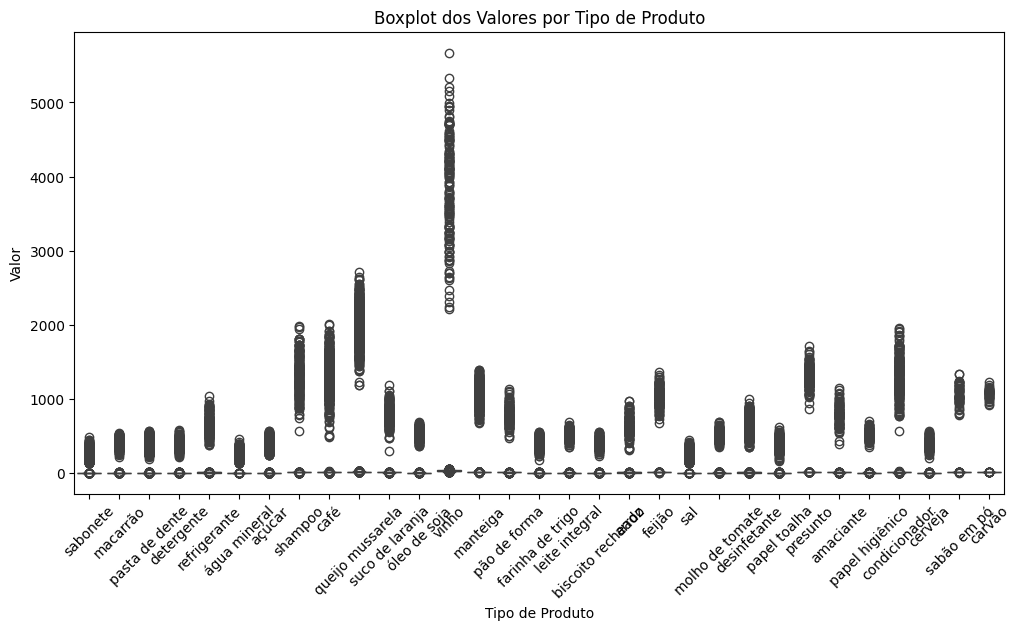

In [21]:
plt.figure(figsize=(12, 6))  # Define o tamanho do gráfico

# Cria um boxplot para visualizar a distribuição dos valores por tipo de produto
sns.boxplot(x=df["produto"], y=df["valor"])

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização
plt.title("Boxplot dos Valores por Tipo de Produto")  # Define o título do gráfico
plt.xlabel("Tipo de Produto")  # Define o rótulo do eixo X
plt.ylabel("Valor")  # Define o rótulo do eixo Y

plt.show()  # Exibe o gráfico


### Análise de Preços do Sabonete da Marca Nivea

- **Filtragem de Dados**: Apenas os preços do sabonete da marca *Nivea* foram selecionados para análise.
- **Visualização com Boxplot**:
  - Representação gráfica da variação de preços dentro do conjunto de dados.
  - Permite identificar valores discrepantes e distribuição dos preços.
- **Ajustes Gráficos**:
  - O tamanho da figura foi configurado para melhor visualização.
  - O título e o rótulo do eixo Y foram adicionados.
  - Uma grade foi inserida para facilitar a leitura dos valores.


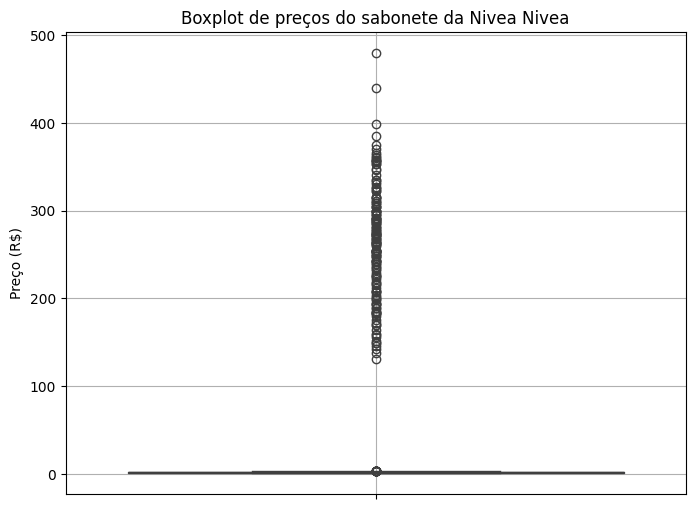

In [22]:
# Filtrar os preços do sabonete de uma marca específica
marca_especifica = 'Nivea' # Define o nome da marca
df_sabonete = df[(df['produto'] == 'sabonete') & (df['marca'] == marca_especifica)]

# Criar o boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_sabonete['valor'])
plt.title(f'Boxplot de preços do sabonete da Nivea {marca_especifica}')
plt.ylabel('Preço (R$)')
plt.grid(True)
plt.show()

### Filtragem de Dados por Produto

- **Produto Selecionado**: Apenas registros do produto *sabonete* foram extraídos do conjunto de dados.
- **Colunas Exibidas**:
  - __produto__: Para garantir que todos os itens filtrados pertencem à categoria correta.
  - __valor__: Para análise dos preços desse produto específico.
- **Objetivo**: Visualizar os preços do produto escolhido, facilitando comparações e detecção de anomalias.


In [23]:
produto_especifico = "sabonete"  # Define o produto a ser filtrado
df_filtrado = df[df["produto"] == produto_especifico]

print(df_filtrado[["produto", "valor"]])  # Exibe apenas as colunas relevantes

         produto   valor
119876  sabonete  288.20
143431  sabonete    2.40
170364  sabonete    2.37
326431  sabonete    1.92
185683  sabonete    2.47
...          ...     ...
37007   sabonete    2.01
47901   sabonete    2.91
199104  sabonete    1.00
172725  sabonete    2.18
180662  sabonete    1.55

[24764 rows x 2 columns]


### Agrupamento de Preços por Marca e Produto

- **Agrupamento de Dados**: Os dados foram agrupados por **marca** e **produto**. Para cada combinação, todos os valores (preços) foram organizados em listas.
- **Colunas Exibidas**:
  - __marca__: Identifica a marca do produto.
  - __produto__: Define o tipo de produto dentro da marca.
  - __valor__: Lista com os preços de cada produto para a marca selecionada.
- **Objetivo**: Organizar os preços por marca e produto para facilitar comparações e análises de variação de preços dentro de cada grupo.


In [24]:
# Agrupa os dados por marca e produto, coletando os valores em uma lista
precos_por_produto_marca = df.groupby(["marca", "produto"])["valor"].apply(list)

# Exibe os preços agrupados por marca e produto
print(precos_por_produto_marca)


marca       produto         
3 Corações  café                [11.15, 5.48, 5.48, 9.21, 10.77, 6.97, 11.35, ...
Adria       macarrão            [2.62, 3.67, 2.47, 3.53, 1.92, 2.87, 3.34, 3.0...
Anaconda    farinha de trigo    [3.37, 3.0, 3.6, 2.48, 3.81, 3.24, 358.94, 2.8...
Aurora      presunto            [9.73, 9.04, 10.43, 8.58, 11.66, 10.12, 9.41, ...
Aviação     manteiga            [8.58, 8.07, 7.55, 8.25, 7.05, 9.08, 8.61, 9.3...
                                                      ...                        
União       açúcar              [2.13, 2.85, 2.45, 2.86, 3.31, 2.9, 3.17, 2.91...
Urbano      arroz               [7.26, 6.46, 4.52, 5.53, 3.92, 6.82, 3.14, 6.0...
Veja        desinfetante        [4.15, 5.08, 4.48, 4.5, 4.31, 5.47, 5.26, 5.67...
Wickbold    pão de forma        [5.5, 7.28, 6.63, 5.82, 6.22, 8.17, 6.16, 4.9,...
Ypê         detergente          [2.67, 2.19, 3.45, 3.45, 2.89, 2.66, 2.36, 3.4...
Name: valor, Length: 93, dtype: object


### Inspeção Inicial dos Dados

- **Propósito**: Exibir as 5 primeiras linhas do DataFrame para ter uma visão geral da estrutura dos dados.
- **Análise**: A exibição das primeiras linhas facilita a verificação da organização das colunas e a consistência dos dados inseridos, permitindo uma análise preliminar.


In [25]:
# Exibe as primeiras 5 linhas do DataFrame para visualizar a estrutura e os dados
display(df.head(5))


,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
119876,0,2019-07-07,11:05:44,Pedro Silva Ramos,sabonete,288.20,7,25.40,Aguardando Pgto,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Lux
143431,0,2019-07-07,11:05:44,Pedro Silva Ramos,sabonete,2.40,15,46.00,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Nivea
4853,0,2019-07-07,11:05:44,Pedro Silva Ramos,macarrão,2.63,14,46.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,3642XXXX,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Renata
364791,0,2019-07-07,11:05:44,Pedro Silva Ramos,pasta de dente,2.98,9,36.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Colgate
170364,1,2018-08-23,17:52:53,Pedro Da Silva Bianquini,sabonete,2.37,9,21.33,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,0.0,Cartão de Crédito,HENRICO VICTOR ALVES,Dove


# Coluna quantidade 

### Boxplot de Quantidades Registradas

- **Objetivo**: Criar um boxplot para visualizar a distribuição dos valores na coluna __quantidade__.
- **Análise**:
  - O boxplot oferece uma visão clara da dispersão dos dados, destacando a mediana, os quartis e possíveis outliers. Isso facilita a análise da variação nas quantidades registradas.
- **Personalização**: 
  - Cores do boxplot foram ajustadas para melhorar a visualização: azul para o contorno e um azul mais claro para o interior.


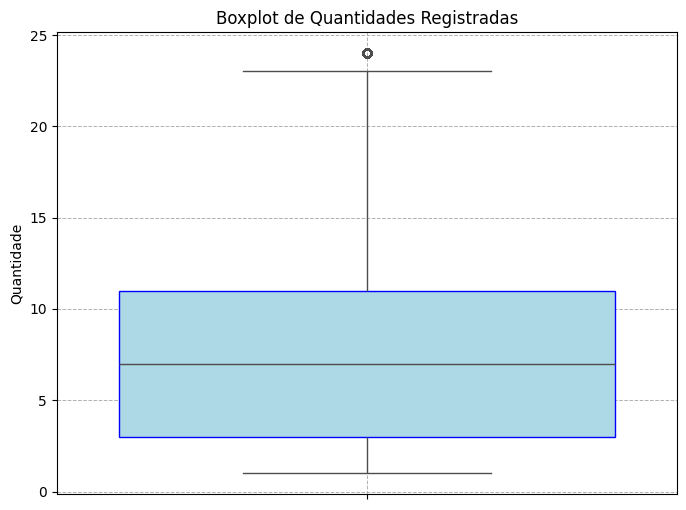

In [26]:
# Criar o boxplot para a coluna 'quantidade'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['quantidade'], color='blue', boxprops=dict(facecolor='lightblue', edgecolor='blue'))
plt.title('Boxplot de Quantidades Registradas')
plt.ylabel('Quantidade')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show() # Exibe o gráfico

### Verificação de Valores Nulos na Coluna 'quantidade'
- **Identificação de Valores Faltantes:** Foi utilizado o método isna() para filtrar e exibir as linhas da coluna total que contêm valores ausentes (NaN).

In [27]:
# Exibe a quantidade de valores nulos em cada coluna do DataFrame
display(df.isnull().sum())

id_da_compra       0
data               0
hora               0
cliente            0
produto            0
valor              0
quantidade         0
total           3685
status             0
cidade             0
estado             0
pais               0
cep                0
frete           7371
pagamento          0
vendedor        3680
marca              0
dtype: int64

# Coluna total 

### Identificação de Valores Nulos em 'Total'

- **Detecção de Nulos em 'Total'**: A função `isna()` foi utilizada para identificar as linhas do DataFrame onde a coluna 'total' possui valores nulos (NaN).


In [28]:
display(df[df['total'].isna()])

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
326431,10,2018-08-17,23:46:42,Mateus José Silva Matias,sabonete,1.92,13,NaN,Em Separação,Barroso,MG,Brasil,36212-000,8.5,Cartão de Crédito,GABRIEL QUEIROZ DE AGUIAR,Dove
1879,25,2019-07-13,14:38:51,Victor Ribas De Moura,sabonete,1.37,1,NaN,Aguardando Pagamento,São Paulo,SP,Brasil,01000-000,0.0,Boleto à Vista,SAMUEL HENRIQUE CAÇADOR,Nivea
130179,31,2020-11-18,10:57:14,Mateus Hugo Cazula Pereira,papel higiênico,3.23,15,NaN,Pagamento Confirmado,Barbacena,MG,Brasil,36200-000,12.0,Transferência Bancária,FELIPE HENRIQUE COSTA BARNABE MARAZO,Dualette
304704,34,2019-10-13,15:40:52,Pedro Victor Alves,papel toalha,3.06,6,NaN,Pagamento Confirmado,Belo Horizonte,MG,Brasil,30000-000,0.0,Transferência Bancária,VICTOR GONÇALVES DONADONI,Snob
264356,51,2020-05-19,08:28:35,Levi Muratori Dutra,pasta de dente,2.95,1,NaN,Em Transporte,Ubá,MG,Brasil,36500-000,0.0,Cartão de Crédito,HENRICO MATOS LIMA DA CUNHA,Oral-B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304567,59926,2022-08-31,05:19:20,Matheus Castilho Cardoso,condicionador,9.22,1,NaN,Pagamento Confirmado,São João de Meriti,RJ,Brasil,25500-000,0.0,Pix,FELIPE HENRIQUE COSTA BARNABE MARAZO,Seda
165533,59928,2018-03-30,19:15:47,Lucas Castilho Cardoso,queijo mussarela,11.37,4,NaN,Aguardando Pagamento,Guarulhos,SP,Brasil,07000-000,0.0,Transferência Bancária,LUCAS VITOR FAÇANHA NEVES,Porto Alegre
284881,59951,2021-09-04,12:18:29,Leticia Augusto De Sousa Ferrari,papel higiênico,3.59,8,NaN,Aguardando Pagamento,Angra dos Reis,RJ,Brasil,23900-000,0.0,Cartão de Crédito,CARLOS QUEIROZ DE AGUIAR,Dualette
286125,59994,2019-03-09,18:43:38,Felipe Da Cunha Teixeira,manteiga,6.62,15,NaN,Pagamento Confirmado,Ubá,MG,Brasil,36500-000,-0.0,Cartão de Crédito,SAMUEL HENRIQUE CAÇADOR,Aviação


<span style="color:red">⚠️ Atenção:</span>
A finalização da coluna "Total" Estara no final do arquivo!!!

# Coluna status 

### Inspeção do DataFrame

- **Visualização das Primeiras Linhas**: As 5 primeiras linhas do DataFrame foram exibidas para verificar as modificações realizadas e confirmar se os dados estão conforme esperado.


In [29]:
display(df.head(5))  # Exibe as 5 primeiras linhas do DataFrame ordenado.

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
119876,0,2019-07-07,11:05:44,Pedro Silva Ramos,sabonete,288.20,7,25.40,Aguardando Pgto,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Lux
143431,0,2019-07-07,11:05:44,Pedro Silva Ramos,sabonete,2.40,15,46.00,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Nivea
4853,0,2019-07-07,11:05:44,Pedro Silva Ramos,macarrão,2.63,14,46.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,3642XXXX,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Renata
364791,0,2019-07-07,11:05:44,Pedro Silva Ramos,pasta de dente,2.98,9,36.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Colgate
170364,1,2018-08-23,17:52:53,Pedro Da Silva Bianquini,sabonete,2.37,9,21.33,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,0.0,Cartão de Crédito,HENRICO VICTOR ALVES,Dove


### Análise dos Valores Únicos em 'Status'

- **Valores Únicos**: A função `unique()` foi utilizada para identificar os valores únicos na coluna 'status', permitindo entender a variedade de status presentes nos dados.


In [30]:
df['status'].unique()  # Exibe os valores únicos presentes na coluna 'status' para entender sua distribuição.

array(['Aguardando Pgto', 'Aguardando Pagamento', 'Pagamento Confirmado',
       'Entregue', 'Em Separação', 'Sep', 'Separando', 'AP',
       'Em Transporte', 'PC', 'Pgto Confirmado', 'Transportando',
       'Transp', 'aguardando pagamento', 'Entg', 'Entregue com Sucesso'],
      dtype=object)

### Correção de Valores na Coluna 'Status'

- **Correção de Abreviações**: Utilizou-se um dicionário de mapeamento para corrigir as abreviações e valores inconsistentes na coluna 'status'. Os valores foram substituídos conforme o dicionário fornecido.
- **Verificação dos Valores Únicos**: Após a correção, foi verificado os valores únicos presentes na coluna 'status' para garantir que as modificações foram aplicadas corretamente.


In [31]:
# Correção de valores na coluna 'status' usando um dicionário de mapeamento
correcao_status = {
    "Aguardando Pgto": "Aguardando Pagamento",
    "Sep": "Em Separação",
    "Separando": "Em Separação",
    "AP": "Aguardando Pagamento",
    "PC": "Pagamento Confirmado",
    "Pgto Confirmado": "Pagamento Confirmado",
    "Transportando": "Em Transporte",
    "Entg": "Entregue",
    "Entregue com Sucesso": "Entregue",
    "Transp": "Em Transporte",
    
}

# Substituindo os valores da coluna 'status' conforme o mapeamento
df["status"] = df["status"].replace(correcao_status)  
df['status'].unique()  # Exibe os valores únicos da coluna 'status' após a correção.

array(['Aguardando Pagamento', 'Pagamento Confirmado', 'Entregue',
       'Em Separação', 'Em Transporte', 'aguardando pagamento'],
      dtype=object)

### Normalização da Coluna 'Status'

- **Conversão para Minúsculas**: Todos os valores na coluna 'status' foram convertidos para minúsculas para garantir uniformidade nos dados.
- **Remoção de Espaços**: Espaços extras no início e no final dos valores da coluna 'status' foram removidos.


In [32]:
df['status'] = df['status'].str.lower().str.strip()  # Converte os valores da coluna 'status' para minúsculas e remove espaços extras.


### Conversão de Tipo da Coluna 'status'

- **Tipo de Dados**: A coluna 'status' foi convertida para o tipo `string` do pandas, garantindo melhor desempenho e compatibilidade com operações de texto e a melhora na legibilidade.

In [33]:
df['status'] = df['status'].astype('string')

# Coluna cidade 

### Análise dos Valores Únicos em 'Cidade'

- **Valores Únicos**: A função `unique()` foi utilizada para identificar os valores únicos na coluna 'cidade', permitindo compreender a diversidade de cidades presentes nos dados.


In [34]:
df['cidade'].unique()  # Exibe os valores únicos presentes na coluna 'cidade' para analisar a variedade de cidades nos dados.


array(['Ouro Branco', 'Duque de Caxias', 'Viçosa', 'São Gonçalo',
       'São João del-Rei', 'Juiz de Fora', 'Belford Roxo',
       'Coronel Xavier Chaves', 'São Paulo', 'Simão Pereira', 'Barroso',
       'Ouro Preto', 'Lima Duarte', 'Magé', 'São Bernardo do Campo',
       'Guarulhos', 'Lagoa Dourada', 'Ewbank da Câmara', 'Ritápolis',
       'Petrópolis', 'Nova Iguaçu', 'Resende Costa', 'Carandaí', 'Muriaé',
       'Barbacena', 'Tocantins', 'Belo Horizonte', 'Itaboraí', 'Mariana',
       'São João de Meriti', 'Campinas', 'São João Nepomuceno', 'Macaé',
       'Congonhas', 'Ubá', 'Angra dos Reis', 'Tiradentes', 'Prados',
       'Cabo Frio', 'Santana do Garambéu', 'Niterói', 'Palma',
       'São José dos Campos', 'Santo André', 'Bicas',
       'Conselheiro Lafaiete', 'Santos Dumont', 'Astolfo Dutra',
       'Leopoldina', 'Matias Barbosa', 'São Vicente de Minas',
       'Cataguases', 'São Tiago', 'Volta Redonda',
       'Campos dos Goytacazes', 'Rio de Janeiro'], dtype=object)

### Conversão de Tipo da Coluna 'status'

- **Tipo de Dados**: A coluna 'status' foi convertida para o tipo `string` do pandas, garantindo melhor desempenho e compatibilidade com operações de texto e a melhora na legibilidade.

In [35]:
df['cidade'] = df['cidade'].astype('string')

# Coluna estado 

### Análise dos Valores Únicos em 'Estado'

- **Valores Únicos**: A função `unique()` foi utilizada para identificar os valores únicos na coluna 'estado', permitindo compreender a diversidade de estados presentes nos dados.


In [36]:
df['estado'].unique()  # Exibe os valores únicos presentes na coluna 'estado' para analisar a variedade de estados nos dados.


array(['MG', 'RJ', 'SP', 'PR', 'São Paulo', 'PSC', 'MTSa', 'RS'],
      dtype=object)

### Correção de Valores na Coluna 'Estado'

- **Correção de Abreviações**: Utilizou-se um dicionário de mapeamento para corrigir abreviações e nomes incompletos na coluna 'estado'. Os valores foram substituídos pelas siglas corretas.
- **Verificação dos Valores Únicos**: Após a correção, foi verificado os valores únicos presentes na coluna 'estado' para garantir que as modificações foram aplicadas corretamente.


In [37]:
# Correção de valores na coluna 'estado' usando um dicionário de mapeamento
correcao_estado = {
    "MTSa": "MS",  # Corrige a abreviação para o estado correto.
    "São Paulo": "SP",  # Substitui o nome completo por sua sigla.
    "PSC": "SC",  # Corrige a abreviação para o estado correto.
}

# Substituindo os valores da coluna 'estado' conforme o mapeamento
df["estado"] = df["estado"].replace(correcao_estado)  
df['estado'].unique()  # Exibe os valores únicos da coluna 'estado' após a correção.


array(['MG', 'RJ', 'SP', 'PR', 'SC', 'MS', 'RS'], dtype=object)

### Conversão de Tipo da Coluna 'estado'

- **Tipo de Dados**: A coluna 'estado' foi convertida para o tipo `string` do pandas, garantindo melhor desempenho e compatibilidade com operações de texto e a melhora na legibilidade.

In [38]:
df['estado'] = df['estado'].astype('string')

# Coluna pais

### Análise dos Valores Únicos em 'País'

- **Valores Únicos**: A função `unique()` foi utilizada para identificar os valores únicos na coluna 'pais', permitindo compreender a diversidade de países presentes nos dados.


In [39]:
df['pais'].unique()  # Exibe os valores únicos presentes na coluna 'pais' para analisar a variedade de países nos dados.


array(['Brasil'], dtype=object)

### Conversão de Tipo da Coluna 'pais'

- **Tipo de Dados**: A coluna 'pais' foi convertida para o tipo `string` do pandas, garantindo melhor desempenho e compatibilidade com operações de texto e a melhora na legibilidade.

In [40]:
df['pais'] = df['pais'].astype('string')

# Coluna cep 

### Análise dos Valores Únicos em 'CEP'

- **Valores Únicos**: A função `unique()` foi utilizada para identificar os valores únicos na coluna 'cep', permitindo compreender a diversidade de códigos postais presentes nos dados.


In [41]:
df['cep'].unique()  # Exibe os valores únicos presentes na coluna 'cep' para analisar a diversidade de códigos postais nos dados.


array(['36420-000', '3642XXXX', '25000-000', '36570-000', '24400-000',
       '36300-000', '36000-000', '26100-000', '36330-000', '01000-000',
       '36123-000', '36212-000', '35400-000', '36140-000', '25900-000',
       '09700-000', '07000-000', '36345-000', '36108-000', '36335-000',
       '25600-000', '26000-000', '36340-000', '36280-000', '36880-000',
       '26XXXXXX', '36200-000', '36510-000', '30000-000', '24800-000',
       '248XXXXX', 'X97XXXXX', '35420-000', '25500-000', '13000-000',
       '36680-000', '3668XXXX', '27900-000', '36415-000', '36415XXX',
       '36500-000', '23900-000', '36325-000', '36320-000', '28900-000',
       '36196-000', '24000-000', '36710-000', '12200-000', '3651XXXX',
       '3614XXXX', '09000-000', '36600-000', 'X1XXXXXX', '36400-000',
       '244XXXXX', '36240-000', '36780-000', '36700-000', '367XXXXX',
       '3657XXXX', '36120-000', '3688XXXX', '37370-000', '364XXXXX',
       '36770-000', '36123XXX', '36350-000', '3XXXXXXX', '27200-000',
       '

### Identificação de CEPs com 'X'

- **Filtragem de Dados**: Foi filtrado o DataFrame para identificar registros em que a coluna 'cep' contivesse a letra 'X', o que pode indicar dados inconsistentes ou erros de entrada.
- **Exibição dos Resultados**: As linhas que atendem a essa condição foram exibidas para análise posterior.


In [42]:
# Filtra linhas onde a coluna 'cep' contém a letra 'X'
ceps_com_x = df[df['cep'].str.contains('X', na=False)]  # Verifica se 'X' aparece no valor de 'cep'.

# Exibe os resultados encontrados
display(ceps_com_x)  # Exibe as linhas que contêm 'X' na coluna 'cep' para análise.


,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
4853,0,2019-07-07,11:05:44,Pedro Silva Ramos,macarrão,2.63,14,46.82,aguardando pagamento,Ouro Branco,MG,Brasil,3642XXXX,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Renata
315030,29,2018-09-20,18:34:58,Miguel Malaquias De Souza Oliveira,açúcar,2.45,3,7.35,em separação,Nova Iguaçu,RJ,Brasil,26XXXXXX,0.0,Cartão de Crédito,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,União
70121,36,2021-03-19,23:34:48,Gabriel Silva Ramos,pão de forma,7.79,3,23.37,em separação,Itaboraí,RJ,Brasil,248XXXXX,0.0,Pix,PAULO SOUZA RONCETE,Nutrella
89751,37,2020-12-09,16:07:49,Miguel Vieira Demarque,shampoo,10.51,14,147.14,em transporte,São Bernardo do Campo,SP,Brasil,X97XXXXX,0.0,Pix,CARLOS QUEIROZ DE AGUIAR,Dove
338709,42,2022-06-09,17:22:19,Matheus Paulo Alves Alvim,pão de forma,5.65,1,24.15,em separação,Itaboraí,RJ,Brasil,248XXXXX,18.5,Boleto,VICTOR GONÇALVES DONADONI,Nutrella
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47907,59914,2021-01-14,01:10:51,Paulo Victor Alves,desinfetante,4.04,1,4.04,pagamento confirmado,São José dos Campos,SP,Brasil,122XXXXX,0.0,Transferência Bancária,FELIPE HENRIQUE COSTA BARNABE MARAZO,Pinho Sol
95990,59928,2018-03-30,19:15:47,Lucas Castilho Cardoso,detergente,2.58,10,25.80,aguardando pagamento,Guarulhos,SP,Brasil,X7XXXXXX,0.0,Transferência Bancária,LUCAS VITOR FAÇANHA NEVES,Limpol
166586,59951,2021-09-04,12:18:29,Leticia Augusto De Sousa Ferrari,papel higiênico,4.17,10,41.70,aguardando pagamento,Angra dos Reis,RJ,Brasil,239XXXXX,0.0,Cartão de Crédito,CARLOS QUEIROZ DE AGUIAR,Personal
174627,59955,2018-11-07,15:49:18,Tiago Stanzani De Jesus,manteiga,9.80,1,9.80,em transporte,Leopoldina,MG,Brasil,367XXXXX,0.0,Cartão de Crédito,HENRICO MATOS LIMA DA CUNHA,Aviação


### Correção do Formato do CEP

- **Substituição de "X" por "0"**: A função `corrigir_cep` substitui a letra "X" por "0" para garantir que os CEPs estejam no formato numérico correto.
- **Remoção de Caracteres Não Numéricos**: A função também remove qualquer caractere não numérico, deixando apenas os números do CEP.
- **Formatação de CEP**: Após garantir que o CEP tenha 8 dígitos, ele é formatado como XXXXX-XXX. Caso o CEP não tenha o tamanho correto, o valor original é mantido.
- **Verificação dos Valores Únicos**: Após a correção, foram verificadas as alterações realizadas, visualizando os valores únicos na coluna 'cep'.


In [43]:
# Função para corrigir o formato do CEP
def corrigir_cep(cep):
    # Substitui "X" por "0" para garantir que o CEP seja válido
    cep = str(cep).replace('X', '0')  
    
    # Remove todos os caracteres que não são números, deixando apenas os números do CEP
    cep = re.sub(r'\D', '', cep)  # \D remove todos os caracteres que não são números
    
    # Garantir que o CEP tenha 8 dígitos e formatá-lo como XXXXX-XXX
    if len(cep) == 8:
        return f"{cep[:5]}-{cep[5:]}"  # Formata o CEP para o padrão XXXXX-XXX
    else:
        return cep  # Retorna o CEP original caso não tenha 8 dígitos válidos

# Aplica a função de correção a todos os valores da coluna 'cep'
df['cep'] = df['cep'].apply(corrigir_cep)

# Exibe os valores únicos após a correção do formato
df["cep"].unique()  # Verifica os valores únicos após a correção do formato dos CEPs.


array(['36420-000', '25000-000', '36570-000', '24400-000', '36300-000',
       '36000-000', '26100-000', '36330-000', '01000-000', '36123-000',
       '36212-000', '35400-000', '36140-000', '25900-000', '09700-000',
       '07000-000', '36345-000', '36108-000', '36335-000', '25600-000',
       '26000-000', '36340-000', '36280-000', '36880-000', '36200-000',
       '36510-000', '30000-000', '24800-000', '35420-000', '25500-000',
       '13000-000', '36680-000', '27900-000', '36415-000', '36500-000',
       '23900-000', '36325-000', '36320-000', '28900-000', '36196-000',
       '24000-000', '36710-000', '12200-000', '09000-000', '36600-000',
       '36400-000', '36240-000', '36780-000', '36700-000', '36120-000',
       '37370-000', '36770-000', '36350-000', '27200-000', '28000-000',
       '20000-000'], dtype=object)

### Conversão de Tipo da Coluna 'cep'

- **Tipo de Dados**: A coluna 'cep' foi convertida para o tipo `string` do pandas, garantindo melhor desempenho e compatibilidade com operações de texto e a melhora na legibilidade.

In [44]:
df['cep'] = df['cep'].astype('string')

# Coluna frete 

### Correção e Conversão da Coluna 'Frete'

- **Remoção de Sinal Negativo**: Todos os valores negativos na coluna 'frete' tiveram o sinal "-" removido, tornando os valores positivos.
- **Conversão para Numérico**: A coluna 'frete' foi convertida para o tipo numérico, com a substituição de erros por `NaN` através do parâmetro `errors='coerce'`.
- **Contagem de Valores Nulos**: A quantidade de valores `NaN` na coluna foi verificada antes e depois da conversão para garantir que os dados fossem manipulados corretamente.
- **Conversão para Float**: A coluna 'frete' foi convertida para o tipo float para assegurar a precisão nos cálculos.


In [45]:
# Exibe a quantidade de valores nulos na coluna 'frete' antes da substituição
display(df['frete'].isnull().sum())  # Mostra quantos valores NaN existem na coluna 'frete'.

# Substitui "-" dos números negativos por "" para tornar os valores positivos
df['frete'] = df['frete'].astype(str).str.replace('-', '', regex=False).str.strip()  # Remove o sinal negativo e os espaços extras.

# Converte a coluna 'frete' para numérico, substituindo erros por NaN
df['frete'] = pd.to_numeric(df['frete'], errors='coerce')  # Coerce converte erros em NaN.

# Exibe a quantidade de valores nulos na coluna 'frete' após a conversão
display(df['frete'].isnull().sum())  # Mostra a quantidade de NaNs após a conversão.

# Converte a coluna 'frete' para float
df['frete'] = df['frete'].astype(float)  # Converte os valores para o tipo float.

# Exibe o DataFrame final com a coluna 'frete' corrigida
display(df)  # Exibe o DataFrame final após as alterações.


np.int64(7371)

np.int64(7371)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
119876,0,2019-07-07,11:05:44,Pedro Silva Ramos,sabonete,288.20,7,25.40,aguardando pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Lux
143431,0,2019-07-07,11:05:44,Pedro Silva Ramos,sabonete,2.40,15,46.00,aguardando pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Nivea
4853,0,2019-07-07,11:05:44,Pedro Silva Ramos,macarrão,2.63,14,46.82,aguardando pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Renata
364791,0,2019-07-07,11:05:44,Pedro Silva Ramos,pasta de dente,2.98,9,36.82,aguardando pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Colgate
170364,1,2018-08-23,17:52:53,Pedro Da Silva Bianquini,sabonete,2.37,9,21.33,pagamento confirmado,Duque de Caxias,RJ,Brasil,25000-000,0.0,Cartão de Crédito,HENRICO VICTOR ALVES,Dove
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255401,59999,2020-05-15,17:36:56,Matheus Santos Da Silva,condicionador,8.27,8,75.66,pagamento confirmado,São Tiago,MG,Brasil,36350-000,9.5,Pix,PAULO SOUZA RONCETE,Dove
271899,59999,2020-05-15,17:36:56,Matheus Santos Da Silva,óleo de soja,3.42,4,23.18,pagamento confirmado,São Tiago,MG,Brasil,36350-000,9.5,Pix,PAULO SOUZA RONCETE,Coamo
312889,59999,2020-05-15,17:36:56,Matheus Santos Da Silva,molho de tomate,3.60,1,13.10,pagamento confirmado,São Tiago,MG,Brasil,36350-000,9.5,Pix,PAULO SOUZA RONCETE,Elefante
285803,59999,2020-05-15,17:36:56,Matheus Santos Da Silva,sabão em pó,8.82,3,35.96,pagamento confirmado,São Tiago,MG,Brasil,36350-000,9.5,Pix,PAULO SOUZA RONCETE,Tixan


### Identificação de Valores Nulos na Coluna 'Frete'

- **Verificação de Valores Nulos**: Foi realizada uma filtragem para identificar e exibir as linhas onde a coluna 'frete' contém valores `NaN`, ou seja, dados ausentes ou incorretos que precisam ser tratados.


In [46]:
# Exibe as linhas do DataFrame onde a coluna 'frete' possui valores NaN
display(df[df['frete'].isna()])  # Exibe as linhas que contêm valores NaN na coluna 'frete'.


,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
234029,27,2019-09-16,14:54:33,Victor Araujo Kuhn,biscoito recheado,3.04,4,12.16,aguardando pagamento,Ewbank da Câmara,MG,Brasil,36108-000,NaN,Pix,CARLOS QUEIROZ DE AGUIAR,Triunfo
125241,33,2022-05-15,15:37:47,Breno Hugo Cazula Pereira,biscoito recheado,2.76,3,8.28,em separação,Barbacena,MG,Brasil,36200-000,NaN,Pix,GABRIEL QUEIROZ DE AGUIAR,Bauducco
260153,51,2020-05-19,08:28:35,Levi Muratori Dutra,suco de laranja,5.98,10,59.80,em transporte,Ubá,MG,Brasil,36500-000,NaN,Cartão de Crédito,HENRICO MATOS LIMA DA CUNHA,Prats
141978,52,2019-04-24,06:57:11,Rafael Matheus Da Silva,pasta de dente,2.06,12,47.72,em separação,Angra dos Reis,RJ,Brasil,23900-000,NaN,Pix,HENRICO VICTOR ALVES,Colgate
18569,68,2021-10-02,10:20:15,Yuri Wilstony De Souza Mendes,queijo mussarela,17.40,10,174.00,em separação,Palma,MG,Brasil,36710-000,NaN,Cartão de Crédito,HENRICO VICTOR ALVES,Quatá
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322809,59947,2018-09-04,22:09:20,Gabriel Cardoso Diniz,pasta de dente,3.28,12,49.36,em transporte,Resende Costa,MG,Brasil,36340-000,NaN,Cartão de Crédito,HENRICO VICTOR ALVES,Oral-B
98912,59950,2018-07-20,14:35:50,Hian Augusto De Sousa Ferrari,amaciante,4.58,8,36.64,aguardando pagamento,Santana do Garambéu,MG,Brasil,36196-000,NaN,Cartão de Crédito,CARLOS QUEIROZ DE AGUIAR,Downy
292916,59958,2020-02-23,08:48:36,João Matheus Da Silva,queijo mussarela,12.02,2,43.04,pagamento confirmado,Volta Redonda,RJ,Brasil,27200-000,NaN,Cartão de Crédito,GABRIEL QUEIROZ DE AGUIAR,Porto Alegre
165067,59959,2022-06-24,20:02:55,Breno Werneck Elizeu,manteiga,7.20,14,100.80,pagamento confirmado,Muriaé,MG,Brasil,36880-000,NaN,Pix,GABRIEL QUEIROZ DE AGUIAR,Itambé


### Visualização da Distribuição dos Valores de Frete

- **Boxplot**: Foi gerado um gráfico de boxplot para visualizar a distribuição dos valores na coluna 'frete'. O boxplot é útil para identificar outliers, a mediana e a dispersão dos dados.
- **Título e Rótulos**: O gráfico foi configurado com título e rótulos apropriados para facilitar a compreensão da informação apresentada.


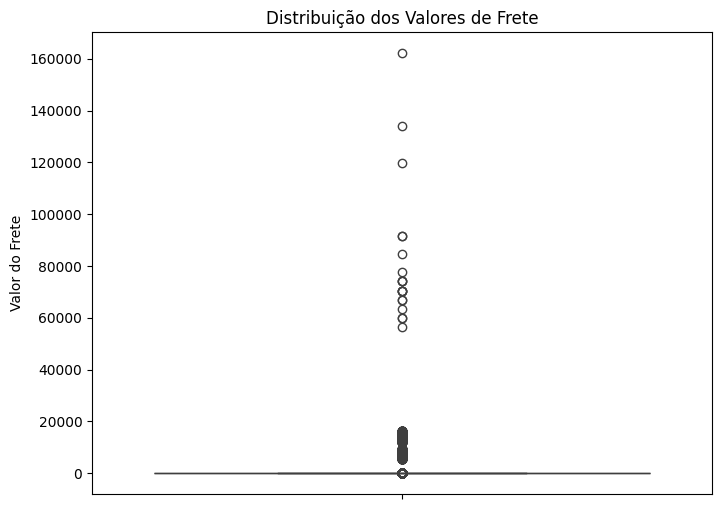

In [47]:
# Criar o gráfico de boxplot para visualizar os valores dos fretes
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["frete"])

# Adicionar título e rótulos
plt.title("Distribuição dos Valores de Frete")
plt.ylabel("Valor do Frete")

# Exibir o gráfico
plt.show()

### Filtragem dos Valores de Frete Acima de 2000

- **Filtro de Valores**: Foi realizada uma filtragem no DataFrame para selecionar apenas os registros onde o valor da coluna 'frete' é superior a 2000.
- **Exibição dos Resultados**: O DataFrame filtrado foi exibido para análise dos valores elevados de frete.


In [48]:
# Filtra os registros onde o valor da coluna 'frete' é superior a 2000
df_filtrado = df[df['frete'] > 2000]  # Seleciona as linhas com valores de frete maiores que 2000.

# Exibe o DataFrame filtrado com os valores de frete acima de 2000
display(df_filtrado)  # Mostra o DataFrame filtrado.


,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
19045,52,2019-04-24,06:57:11,Rafael Matheus Da Silva,queijo mussarela,2073.73,4,86.32,em separação,Angra dos Reis,RJ,Brasil,23900-000,16215.0,Pix,HENRICO VICTOR ALVES,Tirolez
56716,64,2021-10-08,07:18:32,Paulo Da Silva Bianquini,queijo mussarela,15.30,3,64.90,aguardando pagamento,Belford Roxo,RJ,Brasil,26100-000,13395.0,Pix,VICTOR GONÇALVES DONADONI,Tirolez
178655,76,2019-11-05,07:35:45,Marco Henrique Caçador,farinha de trigo,3.24,13,51.12,em separação,Viçosa,MG,Brasil,36570-000,6345.0,Pix,GABRIEL QUEIROZ DE AGUIAR,Anaconda
74606,100,2019-04-22,23:54:24,Breno Picanço Santos Ferreira Silva,feijão,7.11,2,26.72,pagamento confirmado,Ouro Preto,MG,Brasil,35400-000,8812.5,Cartão de Crédito,GABRIEL QUEIROZ DE AGUIAR,Caldo Bom
335960,134,2021-11-11,00:03:35,Matheus Antônio De Decco Oliveira,papel toalha,2.39,11,34.79,pagamento confirmado,Barroso,MG,Brasil,36212-000,5992.5,Boleto,CARLOS QUEIROZ DE AGUIAR,Snob
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187366,59816,2020-07-15,06:02:21,Gabriel Ribeiro Amorim,queijo mussarela,14.29,13,203.77,em separação,São Bernardo do Campo,SP,Brasil,09700-000,12690.0,Pix,SAMUEL HENRIQUE CAÇADOR,Porto Alegre
365923,59821,2021-07-17,10:56:48,Victor Araujo Kuhn,papel higiênico,3.24,14,55.36,pagamento confirmado,Astolfo Dutra,MG,Brasil,36780-000,7050.0,Cartão de Crédito,GABRIEL QUEIROZ DE AGUIAR,Neve
203360,59821,2021-07-17,10:56:48,Victor Araujo Kuhn,queijo mussarela,14.60,14,NaN,pagamento confirmado,Astolfo Dutra,MG,Brasil,36780-000,7050.0,Cartão de Crédito,GABRIEL QUEIROZ DE AGUIAR,Quatá
340299,59909,2022-01-29,12:23:46,Micael Malaquias De Souza Oliveira,suco de laranja,6.68,15,117.20,aguardando pagamento,Campinas,SP,Brasil,13000-000,11985.0,Cartão de Crédito,LUCAS VITOR FAÇANHA NEVES,Prats


### Substituição de Fretes Acima de 2000 com Valores Válidos

- **Iteração sobre as Linhas**: O código itera sobre as linhas do DataFrame, verificando cada valor da coluna 'frete'.
- **Condição de Substituição**: Se o valor do frete for superior a 2000, ele busca por valores de frete com o mesmo CEP, mas com valores menores que 2000 e maiores que 0.0.
- **Substituição do Valor de Frete**: Caso exista um valor válido para o frete, o valor da coluna 'frete' é substituído pelo primeiro valor válido encontrado para o mesmo CEP.


In [49]:
# Itera sobre as linhas do DataFrame
for i, row in df.iterrows():
    # Verifica se o valor do frete é maior que 2000
    if row['frete'] > 2000:
        # Encontra os fretes com o mesmo CEP, mas com valores menores que 2000 e maiores que 0.0
        frete_substituto = df[(df['cep'] == row['cep']) & (df['frete'] < 2000) & (df['frete'] > 0.0)]['frete']
        
        # Se existirem valores válidos de frete para o mesmo CEP, substitui o valor atual
        if not frete_substituto.empty:
            # Substitui o valor do frete com o primeiro valor válido encontrado
            df.at[i, 'frete'] = frete_substituto.iloc[0]  # Substitui pelo primeiro valor de frete válido encontrado.


### Substituição de Fretes 0.0 por Valores Válidos

- **Agrupamento por CEP**: O código agrupa os registros pelo CEP e seleciona o primeiro valor de frete válido para cada grupo (frete > 0.0).
- **Substituição de Fretes**: Para cada linha, se o valor de frete for 0.0, ele é substituído pelo primeiro valor válido de frete encontrado para o mesmo CEP.


In [50]:
# Agrupa os valores válidos de frete por 'cep' e seleciona o primeiro valor para cada grupo
valid_fretes = df[df['frete'] > 0.0].groupby('cep')['frete'].first()  # Obtém o primeiro valor de frete válido por CEP.

# Substitui os valores de frete 0.0 por um valor válido para o mesmo CEP
df['frete'] = df.apply(
    lambda row: valid_fretes[row['cep']] if row['frete'] == 0.0 else row['frete'], axis=1  # Substitui o 0.0 pelo valor válido encontrado.
)


### Substituição de Valores NaN em 'Frete' por Valores Válidos

- **Agrupamento de Fretes Válidos**: O código agrupa os valores de 'frete' por 'cep' e seleciona o primeiro valor de frete válido para cada grupo.
- **Substituição de NaN**: Para cada linha com valor `NaN` na coluna 'frete', ele é substituído pelo primeiro valor de frete válido encontrado para o mesmo 'cep'.


In [51]:
# Agrupa os valores válidos de 'frete' por 'cep' e seleciona o primeiro valor para cada grupo
valid_fretes = df[df['frete'] > 0.0].groupby('cep')['frete'].first()  # Agrupa por 'cep' e pega o primeiro frete válido.

# Substitui os valores NaN da coluna 'frete' por um valor válido encontrado para o mesmo 'cep'
df['frete'] = df.apply(
    lambda row: valid_fretes[row['cep']] if pd.isna(row['frete']) else row['frete'], axis=1  # Substitui NaN pelo primeiro frete válido encontrado.
)


### Verificação de Valores Ausentes (NaN)

- **Contagem de Valores Ausentes**: Foi realizada uma verificação para contar quantos valores ausentes (NaN) existem em cada coluna do DataFrame.


In [52]:
# Exibe a quantidade de valores ausentes (NaN) em cada coluna do DataFrame
df.isnull().sum()


id_da_compra       0
data               0
hora               0
cliente            0
produto            0
valor              0
quantidade         0
total           3685
status             0
cidade             0
estado             0
pais               0
cep                0
frete              0
pagamento          0
vendedor        3680
marca              0
dtype: int64

# Coluna pagamento 

### Verificação dos Valores de 'Pagamento'

- **Valores Únicos de Pagamento**: Foi realizada uma verificação para listar os valores únicos presentes na coluna 'pagamento', ajudando a identificar possíveis inconsistências ou variações nos dados.


In [53]:
# Exibe os valores únicos presentes na coluna 'pagamento'
df['pagamento'].unique()


array(['Cartão de Crédito', 'Transferência Bancária', 'Pix', 'DOC',
       'Cartão Crédito', 'Boleto', 'Boleto à Vista',
       'Cartão Crédito à Vista', 'Pix à Vista', 'TED',
       'Pagamento Instantâneo', 'Boleto no Dinheiro'], dtype=object)

### Correção de Valores na Coluna 'Pagamento'

- **Correção de Inconsistências**: Foi aplicado um mapeamento para corrigir as variações e erros de nomenclatura na coluna 'pagamento', padronizando os valores.
- **Valores Corrigidos**: Os valores "Cartão Crédito", "Boleto à Vista", "Cartão Crédito à Vista", "Pix à Vista", "Pagamento Instantâneo" e "Boleto no Dinheiro" foram alterados para suas versões padronizadas: "Cartão de Crédito", "Boleto", "Pix", respectivamente.


In [54]:
# Dicionário para corrigir os valores inconsistentes na coluna 'pagamento'
correcao_pagamento = {
    "Cartão Crédito": "Cartão de Crédito",  
    "Boleto à Vista": "Boleto",  
    "Cartão Crédito à Vista": "Cartão de Crédito",  
    "Pix à Vista": "Pix",  
    "Pagamento Instantâneo": "Pix",  
    "Boleto no Dinheiro": "Boleto",
}

# Substitui os valores na coluna 'pagamento' com base no dicionário de correção
df["pagamento"] = df["pagamento"].replace(correcao_pagamento) 

# Exibe os valores únicos após a correção
df['pagamento'].unique()  


array(['Cartão de Crédito', 'Transferência Bancária', 'Pix', 'DOC',
       'Boleto', 'TED'], dtype=object)

### Conversão de Tipo da Coluna 'pagamento'

- **Tipo de Dados**: A coluna 'pagamento' foi convertida para o tipo `string` do pandas, garantindo melhor desempenho e compatibilidade com operações de texto e a melhora na legibilidade.

In [55]:
df['pagamento'] = df['pagamento'].astype('string')

# Coluna vendedor 

### Verificação dos Valores de 'Vendedor'

- **Valores Únicos de Vendedor**: Foi realizada uma verificação para listar os valores únicos presentes na coluna 'vendedor', ajudando a identificar possíveis inconsistências ou variações nos dados.


In [56]:
# Exibe os valores únicos presentes na coluna 'vendedor'
df['vendedor'].unique()


array(['VICTOR GONÇALVES DONADONI', 'HENRICO VICTOR ALVES',
       'MICAEL MALAQUIAS DE SOUZA OLIVEIRA',
       'FELIPE HENRIQUE COSTA BARNABE MARAZO', nan,
       'GABRIEL QUEIROZ DE AGUIAR', 'HENRICO MATOS LIMA DA CUNHA',
       'PAULO SOUZA RONCETE', 'SAMUEL HENRIQUE CAÇADOR',
       'LUCAS VITOR FAÇANHA NEVES', 'CARLOS QUEIROZ DE AGUIAR'],
      dtype=object)

### Identificação de Valores Ausentes em 'Vendedor'

- **Linhas com Vendedor Ausente**: Foi feita uma verificação para identificar quais registros possuem valores ausentes (NaN) na coluna 'vendedor'.


In [57]:
# Exibe as linhas do DataFrame onde a coluna 'vendedor' contém valores ausentes (NaN)
display(df[df['vendedor'].isna()])


,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
242065,4,2018-03-13,12:17:20,Samuel Da Silva Bianquini,refrigerante,4.45,6,26.70,entregue,São João del-Rei,MG,Brasil,36300-000,10.5,Transferência Bancária,NaN,Fanta
141594,15,2021-01-09,11:04:35,Hian Da Cunha Teixeira,macarrão,3.67,13,65.71,em separação,São Bernardo do Campo,SP,Brasil,09700-000,18.0,Transferência Bancária,NaN,Adria
280604,55,2018-08-17,14:05:17,Marco Hugo Cazula Pereira,café,14.17,4,68.68,entregue,São João Nepomuceno,MG,Brasil,36680-000,12.0,Transferência Bancária,NaN,Pilão
220126,72,2020-10-03,17:06:29,Gabriel Matheus Da Silva,papel toalha,3.39,5,39.95,em separação,Angra dos Reis,RJ,Brasil,23900-000,23.0,Transferência Bancária,NaN,Elite
101960,130,2019-12-25,23:49:16,Victor Matos Lima Da Cunha,molho de tomate,4.48,10,44.80,pagamento confirmado,Itaboraí,RJ,Brasil,24800-000,18.5,Pix,NaN,Predilecta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255260,59799,2022-11-06,20:31:32,Gabriel Henrique Caçador,sabonete,1.00,9,9.00,aguardando pagamento,Barroso,MG,Brasil,36212-000,8.5,Transferência Bancária,NaN,Lux
288419,59813,2022-11-06,08:16:54,Thiago Antônio De Decco Oliveira,macarrão,2.11,6,29.66,pagamento confirmado,Campinas,SP,Brasil,13000-000,17.0,Boleto,NaN,Adria
101220,59867,2018-02-04,11:44:08,Arthur Augusto De Sousa Ferrari,biscoito recheado,2.97,9,36.73,pagamento confirmado,Muriaé,MG,Brasil,36880-000,10.0,Cartão de Crédito,NaN,Bauducco
282205,59872,2022-01-01,01:52:31,Felipe Werneck Elizeu,açúcar,3.71,2,26.42,em separação,Volta Redonda,RJ,Brasil,27200-000,19.0,Boleto,NaN,Itamarati


### Preenchimento de 'Vendedor'

- **Preenchimento de Valores Ausentes**: Foi utilizado o preenchimento de valores ausentes na coluna 'vendedor', usando o valor anterior ou seguinte dentro de cada grupo de 'id_da_compra'.
- **Verificação Pós-preenchimento**: Após o preenchimento, verificamos se ainda havia valores ausentes e exibimos essas linhas, caso existam.

In [58]:
# Preenche valores ausentes na coluna 'vendedor' com o valor anterior ou seguinte por 'id_da_compra'
df['vendedor'] = df.groupby('id_da_compra')['vendedor'].transform(lambda x: x.ffill().bfill())  

# Verifica se ainda há valores ausentes após o preenchimento
df['vendedor'].isnull().sum()  

# Exibe as linhas com 'vendedor' ainda ausente
display(df[df['vendedor'].isna()])  



C:\Users\rafae\AppData\Local\Temp\ipykernel_1932\3947326517.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['vendedor'] = df.groupby('id_da_compra')['vendedor'].transform(lambda x: x.ffill().bfill())


,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
156700,13035,2022-05-22,14:54:49,João Da Cunha Teixeira,feijão,7.93,3,NaN,pagamento confirmado,Cabo Frio,RJ,Brasil,28900-000,22.0,Cartão de Crédito,NaN,Kicaldo
99695,13035,2022-05-22,14:54:49,João Da Cunha Teixeira,desinfetante,5.31,11,58.41,pagamento confirmado,Cabo Frio,RJ,Brasil,28900-000,22.0,Cartão de Crédito,NaN,Lysoform


### Substituição de Valores Nulos em 'Vendedor'

- **Preenchimento de Valores Nulos**: Os valores nulos (NaN) na coluna 'vendedor' foram substituídos por "Desconhecido" para evitar lacunas nos dados.


In [59]:
#Atrusando os valores nulos de vendedor para "Desconhecido"
df['vendedor'] = df['vendedor'].fillna("Desconhecido")

### Verificação dos Valores de 'Vendedor'

- **Valores Únicos de Vendedor**: Foi realizada uma verificação para listar os valores únicos presentes na coluna 'vendedor', ajudando a identificar possíveis inconsistências ou variações nos dados após a alteração.


In [60]:
# Exibe os valores únicos presentes na coluna 'vendedor'
df['vendedor'].unique()

array(['VICTOR GONÇALVES DONADONI', 'HENRICO VICTOR ALVES',
       'MICAEL MALAQUIAS DE SOUZA OLIVEIRA',
       'FELIPE HENRIQUE COSTA BARNABE MARAZO',
       'GABRIEL QUEIROZ DE AGUIAR', 'HENRICO MATOS LIMA DA CUNHA',
       'PAULO SOUZA RONCETE', 'SAMUEL HENRIQUE CAÇADOR',
       'LUCAS VITOR FAÇANHA NEVES', 'CARLOS QUEIROZ DE AGUIAR',
       'Desconhecido'], dtype=object)

### Verificação de Valores Nulos

- **Contagem de Valores Nulos**: Foi realizada uma verificação para contar a quantidade de valores ausentes (NaN) em cada coluna do DataFrame, garantindo que todos os dados estejam completos.


In [61]:
# Conta o número de valores nulos em cada coluna do DataFrame
df.isnull().sum() 


id_da_compra       0
data               0
hora               0
cliente            0
produto            0
valor              0
quantidade         0
total           3685
status             0
cidade             0
estado             0
pais               0
cep                0
frete              0
pagamento          0
vendedor           0
marca              0
dtype: int64

### Formatação de 'Vendedor'

- **Formatação de Texto**: A coluna 'vendedor' foi convertida para o formato de título, onde a primeira letra de cada palavra fica maiúscula, para padronizar a escrita dos nomes.


In [62]:
# Converte os valores da coluna 'vendedor' para o formato de título (primeira letra de cada palavra maiúscula)
df['vendedor'] = df['vendedor'].str.title() 


### Conversão de Tipo da Coluna 'vendedor'

- **Tipo de Dados**: A coluna 'vendedor' foi convertida para o tipo `string` do pandas, garantindo melhor desempenho e compatibilidade com operações de texto e a melhora na legibilidade.

In [63]:
df['vendedor'] = df['vendedor'].astype('string')

# Coluna marca 

### Análise de Valores Únicos em 'Marca'

- **Verificação de Valores Únicos**: Foi realizada uma análise para identificar os valores únicos presentes na coluna 'marca', ajudando a verificar a diversidade de marcas no conjunto de dados.


In [64]:
df['marca'].unique()

array(['Lux', 'Nivea', 'Renata', 'Colgate', 'Dove', 'Minuano', 'Barilla',
       'Fanta', 'Minalba', 'União', 'Pantene', 'Melitta', 'Tirolez',
       'Dafruta', 'Coamo', 'Salton', 'Aviação', 'Nutrella', 'Anaconda',
       'Del Valle', 'Prats', 'Coca-Cola', 'Piracanjuba', 'Nestlé',
       'Camil', 'Namorado', 'Cisne', 'Fugini', 'Pinho Sol', 'Snob',
       'Porto Alegre', 'Sadia', 'São Lourenço', 'Itambé', 'Elegê',
       'Oral-B', 'Sorriso', 'Confort', 'Quatá', 'Qualy', 'Neve', 'Pilão',
       'Tio João', 'Limpol', 'Pullman', 'Perdigão', 'Adria', 'Personal',
       'Dona Benta', 'Scott', 'Elefante', '3 Corações', 'Liza', 'Soya',
       'Itamarati', 'Kicaldo', 'Caravelas', 'Sol', 'Lysoform',
       'Concha y Toro', 'Heineken', 'Bauducco', 'Seda', 'Triunfo',
       'Predilecta', 'Caldo Bom', 'Brahma', 'Skol', 'Aurora', 'Elite',
       'Dualette', 'Veja', 'Marinho', 'Urbano', 'Tixan',
       'Guaraná Antártica', 'Wickbold', 'Lebre', 'Ypê', 'Miolo',
       'Crystal', 'Downy', 'Fofo', 'Omo',

### Formatação de 'Marca'

- **Formatação de Texto e Limpeza**: A coluna 'marca' foi convertida para o formato de título e os espaços em branco no início e no final de cada valor foram removidos, garantindo uma padronização.
- **Verificação de Valores Únicos**: Foi realizada uma análise para identificar os valores únicos presentes na coluna 'marca', ajudando a verificar a diversidade de marcas no conjunto de dados.


In [65]:
df['marca'] = df['marca'].str.title().str.strip()  # Aplica formatação de título e remove espaços na coluna 'marca'.
df['marca'].unique()  # Retorna os valores únicos na coluna 'marca'.

array(['Lux', 'Nivea', 'Renata', 'Colgate', 'Dove', 'Minuano', 'Barilla',
       'Fanta', 'Minalba', 'União', 'Pantene', 'Melitta', 'Tirolez',
       'Dafruta', 'Coamo', 'Salton', 'Aviação', 'Nutrella', 'Anaconda',
       'Del Valle', 'Prats', 'Coca-Cola', 'Piracanjuba', 'Nestlé',
       'Camil', 'Namorado', 'Cisne', 'Fugini', 'Pinho Sol', 'Snob',
       'Porto Alegre', 'Sadia', 'São Lourenço', 'Itambé', 'Elegê',
       'Oral-B', 'Sorriso', 'Confort', 'Quatá', 'Qualy', 'Neve', 'Pilão',
       'Tio João', 'Limpol', 'Pullman', 'Perdigão', 'Adria', 'Personal',
       'Dona Benta', 'Scott', 'Elefante', '3 Corações', 'Liza', 'Soya',
       'Itamarati', 'Kicaldo', 'Caravelas', 'Sol', 'Lysoform',
       'Concha Y Toro', 'Heineken', 'Bauducco', 'Seda', 'Triunfo',
       'Predilecta', 'Caldo Bom', 'Brahma', 'Skol', 'Aurora', 'Elite',
       'Dualette', 'Veja', 'Marinho', 'Urbano', 'Tixan',
       'Guaraná Antártica', 'Wickbold', 'Lebre', 'Ypê', 'Miolo',
       'Crystal', 'Downy', 'Fofo', 'Omo',

### Conversão de Tipo da Coluna 'marca'

- **Tipo de Dados**: A coluna 'marca' foi convertida para o tipo `string` do pandas, garantindo melhor desempenho e compatibilidade com operações de texto e a melhora na legibilidade.

In [66]:
df['marca'] = df['marca'].astype('string')

# Coluna Total Finalização 

### Preenchimento de 'Total'

- **Cálculo de 'Total'**: Os valores nulos na coluna 'total' foram preenchidos com a multiplicação de 'quantidade' por 'valor', somados ao 'frete', garantindo que o total fosse calculado corretamente para as linhas faltantes.


In [67]:
# Preenche os valores nulos na coluna 'total' com o cálculo da quantidade * valor + frete
df["total"] = df["total"].fillna(df["quantidade"] * df["valor"] + df["frete"])


### Verificação de Valores Nulos em 'Total'

- **Verificação de Valores Ausentes**: Foi realizada uma verificação para identificar se ainda existem valores nulos na coluna 'total', permitindo detectar se o preenchimento foi bem-sucedido.


In [68]:
# Exibe as linhas onde ainda existem valores nulos na coluna 'total'
display(df[df['total'].isna()]) 

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca


# Duplicatas 

### Identificação de Duplicatas

- **Detecção de Duplicatas**: As linhas duplicadas no DataFrame foram identificadas, e todas as ocorrências dessas linhas foram exibidas para análise, garantindo que os dados fossem únicos e sem repetições desnecessárias.


In [69]:
duplicatas = df[df.duplicated(keep=False)]
display(duplicatas)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
78784,10,2018-08-17,23:46:42,Mateus José Silva Matias,sabonete,2.32,3,15.46,em separação,Barroso,MG,Brasil,36212-000,8.5,Cartão de Crédito,Gabriel Queiroz De Aguiar,Lux
80604,10,2018-08-17,23:46:42,Mateus José Silva Matias,sabonete,2.32,3,15.46,em separação,Barroso,MG,Brasil,36212-000,8.5,Cartão de Crédito,Gabriel Queiroz De Aguiar,Lux
37016,16,2022-08-06,05:52:26,Thiago Picanço Santos Ferreira Silva,detergente,3.33,9,39.47,aguardando pagamento,Simão Pereira,MG,Brasil,36123-000,9.5,Transferência Bancária,Gabriel Queiroz De Aguiar,Minuano
211074,16,2022-08-06,05:52:26,Thiago Picanço Santos Ferreira Silva,detergente,3.33,9,39.47,aguardando pagamento,Simão Pereira,MG,Brasil,36123-000,9.5,Transferência Bancária,Gabriel Queiroz De Aguiar,Minuano
106034,22,2018-09-13,10:09:27,Matheus Carlos De Souza,café,5.48,1,5.48,aguardando pagamento,Nova Iguaçu,RJ,Brasil,26000-000,18.0,Transferência Bancária,Victor Gonçalves Donadoni,3 Corações
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237793,59950,2018-07-20,14:35:50,Hian Augusto De Sousa Ferrari,sabonete,2.19,3,6.57,aguardando pagamento,Santana do Garambéu,MG,Brasil,36196-000,8.5,Cartão de Crédito,Carlos Queiroz De Aguiar,Lux
320989,59960,2020-04-25,08:45:50,João Breno Prado Silva,suco de laranja,4.65,5,23.25,em separação,Congonhas,MG,Brasil,36415-000,10.5,Cartão de Crédito,Paulo Souza Roncete,Dafruta
81440,59960,2020-04-25,08:45:50,João Breno Prado Silva,suco de laranja,4.65,5,23.25,em separação,Congonhas,MG,Brasil,36415-000,10.5,Cartão de Crédito,Paulo Souza Roncete,Dafruta
132424,59977,2018-09-13,10:05:24,Miguel Victor Alves,sabonete,1.95,2,3.90,entregue,Bicas,MG,Brasil,36600-000,9.0,Cartão de Crédito,Carlos Queiroz De Aguiar,Lux


### Remoção de Duplicatas

- **Eliminação de Duplicatas**: As linhas duplicadas foram removidas do DataFrame, mantendo apenas a primeira ocorrência de cada linha, garantindo a integridade e unicidade dos dados.


In [70]:
# Remove as duplicatas, mantendo apenas a primeira ocorrência de cada linha.
df = df.drop_duplicates()


# Display Final 

### Exibição do DataFrame Atualizado

- **Visualização Final**: O DataFrame foi exibido após a remoção das duplicatas, permitindo verificar os dados sem repetições, pronto para análises subsequentes.


In [71]:
display(df)  # Exibe o DataFrame atualizado.

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
119876,0,2019-07-07,11:05:44,Pedro Silva Ramos,sabonete,288.20,7,25.40,aguardando pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,Victor Gonçalves Donadoni,Lux
143431,0,2019-07-07,11:05:44,Pedro Silva Ramos,sabonete,2.40,15,46.00,aguardando pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,Victor Gonçalves Donadoni,Nivea
4853,0,2019-07-07,11:05:44,Pedro Silva Ramos,macarrão,2.63,14,46.82,aguardando pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,Victor Gonçalves Donadoni,Renata
364791,0,2019-07-07,11:05:44,Pedro Silva Ramos,pasta de dente,2.98,9,36.82,aguardando pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,Victor Gonçalves Donadoni,Colgate
170364,1,2018-08-23,17:52:53,Pedro Da Silva Bianquini,sabonete,2.37,9,21.33,pagamento confirmado,Duque de Caxias,RJ,Brasil,25000-000,19.0,Cartão de Crédito,Henrico Victor Alves,Dove
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255401,59999,2020-05-15,17:36:56,Matheus Santos Da Silva,condicionador,8.27,8,75.66,pagamento confirmado,São Tiago,MG,Brasil,36350-000,9.5,Pix,Paulo Souza Roncete,Dove
271899,59999,2020-05-15,17:36:56,Matheus Santos Da Silva,óleo de soja,3.42,4,23.18,pagamento confirmado,São Tiago,MG,Brasil,36350-000,9.5,Pix,Paulo Souza Roncete,Coamo
312889,59999,2020-05-15,17:36:56,Matheus Santos Da Silva,molho de tomate,3.60,1,13.10,pagamento confirmado,São Tiago,MG,Brasil,36350-000,9.5,Pix,Paulo Souza Roncete,Elefante
285803,59999,2020-05-15,17:36:56,Matheus Santos Da Silva,sabão em pó,8.82,3,35.96,pagamento confirmado,São Tiago,MG,Brasil,36350-000,9.5,Pix,Paulo Souza Roncete,Tixan


In [72]:
df.info()  # Exibe informações gerais sobre o DataFrame, como número de entradas, tipos de dados e valores nulos.

<class 'pandas.core.frame.DataFrame'>
Index: 362000 entries, 119876 to 296019
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id_da_compra  362000 non-null  int64         
 1   data          362000 non-null  datetime64[ns]
 2   hora          362000 non-null  object        
 3   cliente       362000 non-null  string        
 4   produto       362000 non-null  string        
 5   valor         362000 non-null  float64       
 6   quantidade    362000 non-null  int64         
 7   total         362000 non-null  float64       
 8   status        362000 non-null  string        
 9   cidade        362000 non-null  string        
 10  estado        362000 non-null  string        
 11  pais          362000 non-null  string        
 12  cep           362000 non-null  string        
 13  frete         362000 non-null  float64       
 14  pagamento     362000 non-null  string        
 15  vendedor      362

In [73]:
display(df)  # Exibe o DataFrame atualizado.

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
119876,0,2019-07-07,11:05:44,Pedro Silva Ramos,sabonete,288.20,7,25.40,aguardando pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,Victor Gonçalves Donadoni,Lux
143431,0,2019-07-07,11:05:44,Pedro Silva Ramos,sabonete,2.40,15,46.00,aguardando pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,Victor Gonçalves Donadoni,Nivea
4853,0,2019-07-07,11:05:44,Pedro Silva Ramos,macarrão,2.63,14,46.82,aguardando pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,Victor Gonçalves Donadoni,Renata
364791,0,2019-07-07,11:05:44,Pedro Silva Ramos,pasta de dente,2.98,9,36.82,aguardando pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,Victor Gonçalves Donadoni,Colgate
170364,1,2018-08-23,17:52:53,Pedro Da Silva Bianquini,sabonete,2.37,9,21.33,pagamento confirmado,Duque de Caxias,RJ,Brasil,25000-000,19.0,Cartão de Crédito,Henrico Victor Alves,Dove
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255401,59999,2020-05-15,17:36:56,Matheus Santos Da Silva,condicionador,8.27,8,75.66,pagamento confirmado,São Tiago,MG,Brasil,36350-000,9.5,Pix,Paulo Souza Roncete,Dove
271899,59999,2020-05-15,17:36:56,Matheus Santos Da Silva,óleo de soja,3.42,4,23.18,pagamento confirmado,São Tiago,MG,Brasil,36350-000,9.5,Pix,Paulo Souza Roncete,Coamo
312889,59999,2020-05-15,17:36:56,Matheus Santos Da Silva,molho de tomate,3.60,1,13.10,pagamento confirmado,São Tiago,MG,Brasil,36350-000,9.5,Pix,Paulo Souza Roncete,Elefante
285803,59999,2020-05-15,17:36:56,Matheus Santos Da Silva,sabão em pó,8.82,3,35.96,pagamento confirmado,São Tiago,MG,Brasil,36350-000,9.5,Pix,Paulo Souza Roncete,Tixan
